**Предполагается использование интерпретатора Python 3.**

# 1. Задание (Оптимизация)

## Аналитический поиск максимума первой функции

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np

FIG_SIZE = (12, 10)

Рассмотрим первую функцию.
$$
    f_1(x,y)=\dfrac{1}{2} - \dfrac{\sin^2 \left(\sqrt{x^2+y^2} \right) - \dfrac{1}{2}}{1+\dfrac{x^2+y^2}{1000}}
$$

Для начала построи график функции с помощью Matplotlib и numpy.

In [2]:
def f1(x: np.ndarray, y: np.ndarray):
    return 0.5 - (np.sin(np.sqrt(x ** 2 + y ** 2)) ** 2 - 0.5) / (1 + (x ** 2 + y**2) / 1000)

In [3]:
def eval_f_on_grid(xmin, xmax, ymin, ymax, func, x_size=100, y_size=100):
    x = np.linspace(xmin, xmax, num=x_size)
    y = np.linspace(ymin, ymax, num=y_size)
    xx, yy = np.meshgrid(x, y)
    return xx, yy, func(xx, yy)

def plot_3d(x, y, z, title: str):
    fig = plt.figure(figsize=FIG_SIZE)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f1")
    ax.view_init(45, 40)
    ax.plot_surface(x, y, z)

def plot_contour(x, y, z, title: str):
    fig = plt.figure(figsize=FIG_SIZE)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    cs = ax.contourf(x, y, z, cmap=cm.gnuplot)
    fig.colorbar(cs)

In [4]:
xx, yy, zz = eval_f_on_grid(-20, 20, -20, 20, f1)

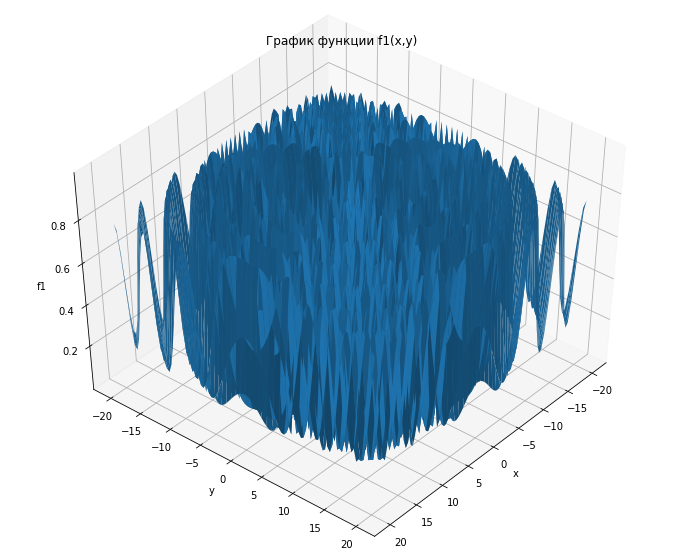

In [5]:
plot_3d(xx, yy, zz, "График функции f1(x,y)")

Из графика видно, что функция имеет достаточно сложный рельеф. Графически примерное расположение глобального максимума трудно найти. Построим значения линий уровня функции.

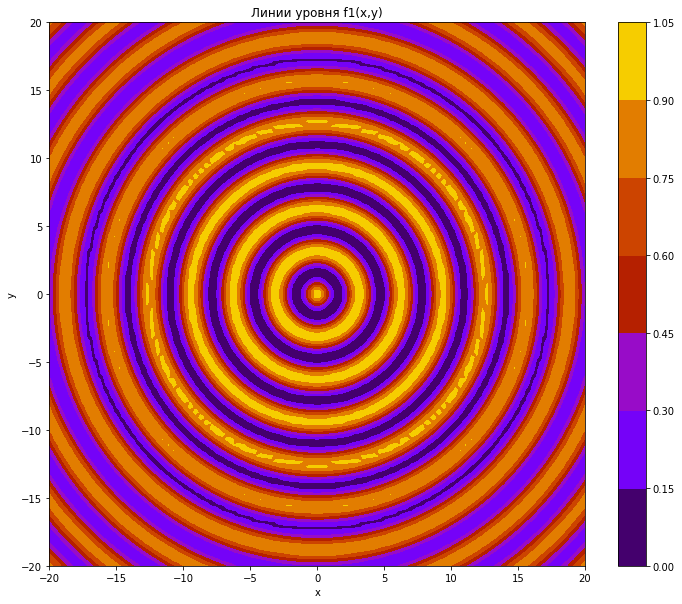

In [6]:
plot_contour(xx, yy, zz, "Линии уровня f1(x,y)")
del xx
del yy
del zz

Из графика линий уровня можно увидеть, что значения функции по мере удаления от центра становятся меньше.

Рассмотрим аналитическое опредление глобального максимума. Для этого сделаем замену $ z = x^2+y^2 $. Исходная функция примет вид:
$$
    f_1(z)=\dfrac{1}{2} - \dfrac{\sin^2 \left(\sqrt{z} \right) - \dfrac{1}{2}}{1+\dfrac{z}{1000}},
$$
где $ z \geqslant 0 $. Проанализируем поведение этой функции в зависимости от значенйи $ z$. Перепишем значение функции в другой форме:
$$
  f_1(z)=\dfrac{1}{2} - \dfrac{1000 \sin^2 \left(\sqrt{z} \right) - 500}{1000+z},
$$

Рассмотрим предел:
$$
\lim_{z->+\infty} - \dfrac{1000 \sin^2 \left(\sqrt{z} \right) - 500}{1000+z} = \lim_{z->+\infty} -\dfrac{1000 \left( \dfrac{1 - \cos(2\sqrt{z})}{2}\right) -500}{1000+z} = \lim_{z->+\infty} \dfrac{500 \cos(2\sqrt{z})}{1000+z} = 0
$$

Это означает, что при увеличении $ z $ функция стремится к $ 1/2$. Рассмртрим преобразованную функцию $ f_1(z) $:
$$
f_1(z)=\dfrac{1}{2} + \dfrac{500 \cos(2\sqrt{z})}{1000+z}.
$$
 Построи график функции в зависимости от $ z $.

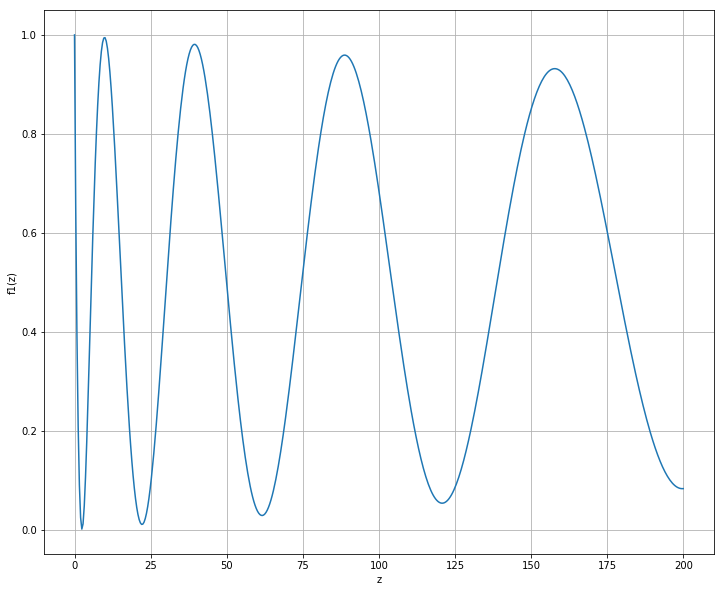

In [7]:
z = np.linspace(0, 200, num=500)
f1z = 0.5 + 500 * np.cos(2 * np.sqrt(z)) / (1000 + z)

fig = plt.figure(figsize=FIG_SIZE)
plt.xlabel("z")
plt.ylabel("f1(z)")
plt.plot(z, f1z, figure=fig)
plt.grid(True)

del z
del f1z

Из рисунка видно, что максимальное значение может находиться при $ z = 0$.
Также подозрителен второй максимум между 0 и 25. Для разрешения этой ситуации необходимо исследовать поведение $ f_1(z) $. Для этого необходимо сравнить значения $ f_1(0)$ и $ f_1(z) $ при $ z > 0 $. Для этого достаточно сравнить значения 
$$ 
\dfrac{500 \cos(2\sqrt{z})}{1000+z}
$$

$$ 
\dfrac{500 \cos(2\sqrt{z})}{1000+z} = \dfrac{\cos(2\sqrt{z})}{2+\dfrac{z}{500}} \leqslant \dfrac{1}{2+\dfrac{z}{500}}
$$

При $ z > 0 $
$$
\dfrac{1}{2+\dfrac{z}{500}} < \dfrac{1}{2}
$$

Следовательно 
$$
f_1(z) < 1, z > 0.
$$

Значит, при $ z = 0, f_1(0) = 1 $ достигает максимума. С учётом замены: $ z = x^2+y^2$ получается, что $ x^2 + y^2 = 0 $. Этому уравнению удовлетворяет точка $ (x, y) = (0,0)$. Значит она является точкой глобального максимума.

In [8]:
xx, yy, zz = eval_f_on_grid(-5, 5, -5, 5, f1)

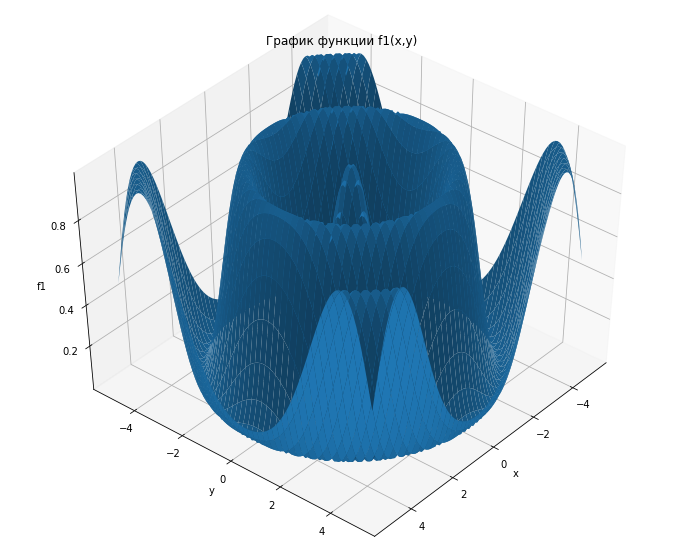

In [9]:
plot_3d(xx, yy, zz, "График функции f1(x,y)")
del zz
del xx
del yy

## Поиск максимума численными методами

Если функция задана как чёрный ящик, то необходимо определиться с информацией, которая известна о фуекции. Если ничего, кроме информации о значении функции в точке неизветсно, то необходимо использовать методы нулевого порядка. Для этого разработаны ссотвествующие методы оптимизации. Будем использовать методы оптимизации из пакета scipy.Так как большинство методов расчитаны на поиск глоабльного максимума на ограниченном множестве допустимых решений, то необходимо будет определиться с ограничениями.

In [10]:
from scipy import optimize

Важно не забыть поменять знак значения целевой функции так как мы ищем максимум, а методы в пакете scipy предназначены для поиска минимума.

In [11]:
def f1(x: np.ndarray):
    z = (x ** 2).sum()
    return -(0.5 - (np.sin(np.sqrt(z)) ** 2 - 0.5) / (1 + z / 1000))

Решим задачу несколько раз и разными методами для более уверенного результата.

In [12]:
def maximize(target_func, bounds, *methods,**kwargs):
    num_run = kwargs["num_run"]
    results = []
    for method in methods:
        for i in range(num_run):
            results.append(method(target_func, bounds))
    return results

In [13]:
results = maximize(f1, ((-1000, 1000),) * 2, 
         optimize.dual_annealing, optimize.differential_evolution, num_run=50)

In [14]:
def print_results(results: list):
    for res in results:
        print(f"f1(x) = {-res.fun}, x = {res.x}")

In [15]:
print_results(results)

f1(x) = 0.995115820947843, x = [-2.58999891 -1.77531217]
f1(x) = 0.9951158209507442, x = [-3.13818321  0.10791416]
f1(x) = 0.9951158209493769, x = [ 2.04721551 -2.38091152]
f1(x) = 0.9951158209445511, x = [-1.05069385 -2.95903643]
f1(x) = 0.9951158209495057, x = [ 1.5423706  -2.73512784]
f1(x) = 0.9951158209507633, x = [0.99904906 2.97686739]
f1(x) = 0.995115820950762, x = [-2.72475998  1.56061566]
f1(x) = 0.995115820947126, x = [-0.81662202  3.03199257]
f1(x) = 0.9810192512564819, x = [ 4.86749883 -3.96836485]
f1(x) = 0.9951158209502082, x = [ 1.68702279 -2.64835569]
f1(x) = 0.9951158209496846, x = [-2.00934608  2.41295946]
f1(x) = 0.9951158209507613, x = [-0.11272919  3.13801384]
f1(x) = 0.9951158209491776, x = [3.13501826 0.17745699]
f1(x) = 0.9951158209431119, x = [-0.34069966 -3.12150279]
f1(x) = 0.9951158209507374, x = [-1.48934775 -2.76435901]
f1(x) = 0.9951158209507622, x = [2.65405068 1.67805042]
f1(x) = 0.9951158209502662, x = [-2.78394771  1.45240116]
f1(x) = 0.9951158209502

Выберем наилучший результат.

In [16]:
global_res = min(results, key=lambda x: x.fun)

Надо помнить, что мы искали максимум, но использовали методы оптимзации, которые ищут минимум, поэтому надо помнить о смене знака в значении целевой функцтии.

In [17]:
print(global_res)
del results

     fun: -1.0
     jac: array([1.11022302e-08, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2229
     nit: 73
 success: True
       x: array([-2.99755220e-09, -6.98035461e-09])


Даже при грубом приближении удалось найти достаточно хорошее решение. Для более точного поиска можно уменьшить размер множества допустимых решений, а также блее аккуратно подьирать параметры методов оптимизации.

## Аналитический поиск максимума второй функции

Поик максимума функции $f_2(z) $ можно заменить на поиск минимума функции $ g(z) = \left\vert z^6 - 1\right\vert$. Так как модуль комплексного числа неотрицателен и на $ z $ не наложено ограничений, то минимум достигается при $ g(z) = 0 $. Это эквивалентно решению уравнения:
$$
z^6 = 1
$$

$$
z = \sqrt[6]{1}
$$

Осталось только найти корни уравнения:
* Модуль $ \left\vert 1 \right\vert = 1$.
* Аргумент $ \phi = 0 $.

$$
z = \sqrt[6]{1} \left( \cos{\dfrac{2 \pi k}{6}} + \imath \sin{\dfrac{2\pi k}{6}}\right),
$$

где $ k = 0,1,\ldots,5 $.

Точки глобального максимума представлены ниже:
$$
\begin{array}{cc}
 x & y \\
 1 & 0 \\
 \frac{1}{2} & \frac{\sqrt{3}}{2} \\
 -\frac{1}{2} & \frac{\sqrt{3}}{2} \\
 -1 & 0 \\
 -\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
 \frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\end{array}
$$

Значение фелевой функции $ f_2(z) = 1 $ в этих точках.

Для потсроения граифка функции перейдём к полярным кооридантам.

$ x =r \sin \phi, y = r \sin \phi $. Исходная функция $ f_2(z) $ преобразуется в
$$ 
f_2(r, \phi) = \dfrac{1}{1 + \sqrt{(r^6 \cos 6 \phi -1)^2 + r^{12} \sin^2 6\phi}}
$$

In [18]:
def f2(xx, yy):
    z = xx + 1j * yy
    phi = np.angle(z)
    r = np.absolute(z)
    r_pow6 = r ** 6
    r_pow12 = r_pow6 * r_pow6
    phi *= 6
    denum = np.sqrt((r_pow6 * np.cos(phi) -1) ** 2 + r_pow12 * np.sin(phi)**2)
    return 1 / (1 + denum)

In [19]:
xx, yy, zz = eval_f_on_grid(-2, 2, -2, 2, f2, x_size=200, y_size=200)

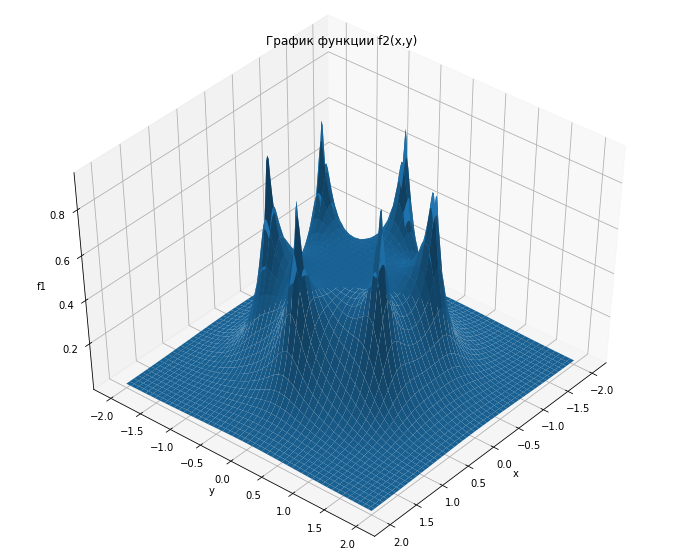

In [20]:
plot_3d(xx, yy, zz, "График функции f2(x,y)")
del xx
del yy
del zz

На графике видны 6 глобальных максимумов, которые были найдены ранее. 

## Поиск максимума численными методами

In [21]:
import cmath 
import math 

def f2(x: np.ndarray):
    r, phi = cmath.polar(complex(x[0], x[1]))
    r_pow6 = r ** 6
    r_pow12 = r_pow6 * r_pow6
    phi *= 6
    denum = np.sqrt((r_pow6 * math.cos(phi) -1) ** 2 + r_pow12 * math.sin(phi)**2)
    return -(1 / (1 + denum))

In [22]:
results = maximize(f2, ((-1000, 1000),) * 2, 
         optimize.dual_annealing, optimize.differential_evolution, num_run=50)

In [23]:
print_results(results)

f1(x) = 0.9999999601777005, x = [0.5       0.8660254]
f1(x) = 0.9999999608561378, x = [0.5       0.8660254]
f1(x) = 0.9999999578194723, x = [ 9.99999995e-01 -4.70780314e-09]
f1(x) = 0.9999999768097093, x = [ 9.99999998e-01 -3.41134798e-09]
f1(x) = 0.9999999874830868, x = [-9.99999998e-01 -1.27310279e-09]
f1(x) = 0.9999999570061574, x = [-0.50000001 -0.86602541]
f1(x) = 0.9999999575889262, x = [-1.00000000e+00 -4.99655533e-09]
f1(x) = 0.9999999874840136, x = [-9.99999998e-01 -1.38938492e-09]
f1(x) = 0.999999964876043, x = [ 9.99999996e-01 -4.58009038e-09]
f1(x) = 0.9999999904134199, x = [ 9.99999998e-01 -1.26587835e-10]
f1(x) = 0.9999999859282578, x = [9.99999998e-01 1.38706036e-10]
f1(x) = 0.9999999607001469, x = [ 9.99999995e-01 -4.70675660e-09]
f1(x) = 0.9999999860338731, x = [9.99999999e-01 1.97578991e-09]
f1(x) = 0.9999999594313339, x = [-1.00000001e+00 -4.49563413e-09]
f1(x) = 0.9999999695704558, x = [ 9.99999995e-01 -1.84388503e-11]
f1(x) = 0.9999999744460537, x = [-0.5        -0

По результатам видно, что были найдены различные точки глобального максимума. Их можно изобразить на плоскости, чтобы понять все или все точки глобального максимума удалось найти.

Text(0, 0.5, 'y')

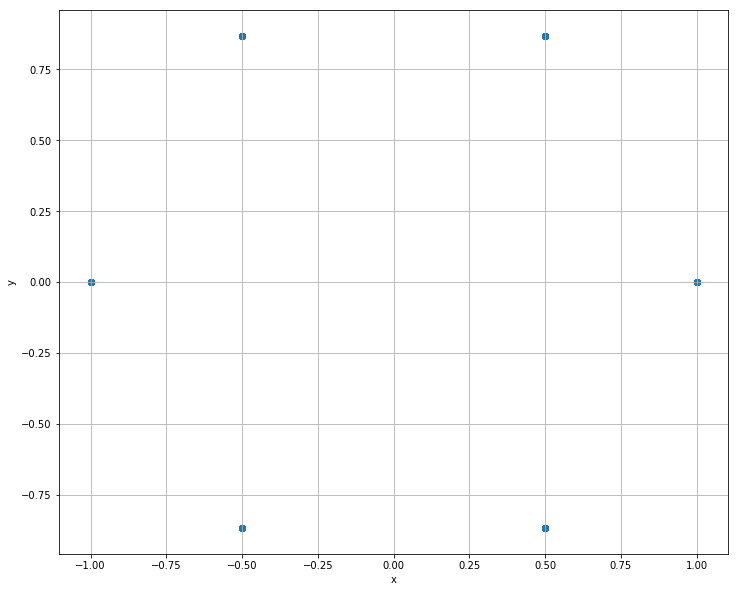

In [24]:
fig = plt.figure(figsize=FIG_SIZE)
x = [res.x[0] for res in results]
y = [res.x[1] for res in results]
plt.scatter(x, y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")